Importing all libaries nessesary

In [34]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import json 
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords



This goes through the JSONL file in a loop with O(n) runtime. Due to length of the file this is inefficant and another way needs to be found.

In [36]:
# Initialize an empty list to store the JSON objects
data = []


# df = pd.DataFrame()
# df= pd.read_json('ca_test_data_final_OFFICIAL.jsonl')


# Open the file and read line by line
with open('ca_test_data_final_OFFICIAL.jsonl', 'r') as file:
    for line in file:
        # Parse each line as a JSON object and append to the list
        data.append(json.loads(line))

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)
df.head()
print("Notebook 1 = best notebook because I said so thats why")

Notebook 1 = best notebook because I said so thats why


Much simpilar verson that does most of the same thing, but does not seperate it the same as the previous verson instead putting it into coloumbs. (This is incorect this does put the data into coloumbs)

In [43]:
df = pd.read_json('ca_test_data_final_OFFICIAL.jsonl', lines=True)

selected_columns = ['summary', 'title', 'sum_len']
dataf_Summaries = df[selected_columns].copy()

selected_columns[1] = 'bill_id'
df = df.drop(columns=selected_columns)

stop = nltk.download('stopwords')

stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


textCell = df.iat[3, df.columns.get_loc('text')]
summaryCell = dataf_Summaries.iat[3, dataf_Summaries.columns.get_loc('summary')]

print(textCell)
print("\n\n\nSummary")
print(summaryCell)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naesl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The people State California enact follows: SECTION 1. Section 75220 Public Resources Code amended read: 75220. (a) The Transit Intercity Rail Capital Program hereby created fund transformative capital improvements, defined subdivision (d), modernize California’s intercity, commuter, urban rail systems bus ferry transit systems achieve following policy objectives: (1) Reduce emissions greenhouse gases. (2) Expand improve transit service increase ridership. (3) Integrate rail service state’s various rail operators, including integration high-speed rail system. (4) Improve transit safety. (b) The Transportation Agency shall evaluate applications consistent criteria set forth part approve multiyear program projects funding pursuant Section 75224, may revised necessary. (c) The California Transportation Commission shall allocate funding applicants pursuant program projects approved Transportation Agency. (d) “Transformative capital improvement” means rail, bus, ferry transit project signifi

Histogram plot of the Sumerization length. Top is with outlires and the bottom is with one outlire removed. 

<AxesSubplot:ylabel='Frequency'>

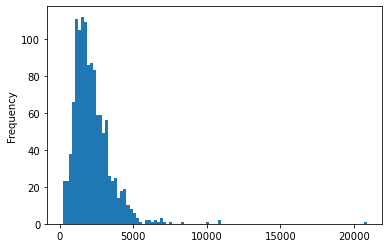

In [38]:
dataf_Summaries["sum_len"].plot(kind = "hist", bins=100)
